The source for this lecture is in *SageMath* kernel *Jupyter* notebook.
For more information, see [jupyter.org](http://jupyter.org/) and [sagemath.org](http://www.sagemath.org/).

See [ricopic.one/measurement/notebooks](http://ricopic.one/measurement/notebooks) for the source code notebook.
First, we import packages and all that.
We use `matplotlib` for plotting and `numpy` for numerics.

In [13]:
import sys
# append location of packages
sys.path.append('/usr/local/Cellar/python/2.7.13_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages')
sys.path.append('/usr/local/Cellar/python/2.7.13_1/Frameworks/Python.framework/Versions/2.7/lib/site-python')
# suppress subroutines from printing
save_stdout = sys.stdout
sys.stdout = open('trash', 'w')
sys.stdout = save_stdout
# load other packages
from matplotlib2tikz import save as tikz_save
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Helvetica Neue'
rcParams['font.size'] = '10'
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

Let's consider a periodic function $f$ with period $T$ (`T`). Each period, the function has a triangular pulse of width $\delta$ (`pulse_width`) and height $\delta/2$.

In [93]:
save_figures = False # true to save LaTeX figures
T = 20 # period
pulse_width = 2 # pulse width
f1(x) = pulse_width/2-abs(x) # first pulse
f2(x) = pulse_width/2-abs(x-T) # second pulse
omega_max = 12 # rad/s max frequency in line spectrum
n_max = round(omega_max*T/(2*pi)) # corresponding max harmonic

First, we plot a the function $f$ in the time domain.
Using the *SageMath* `piecewise` function due to its Fourier Series methods (used momentarily), we define it and use `matplotlib` to plot it.

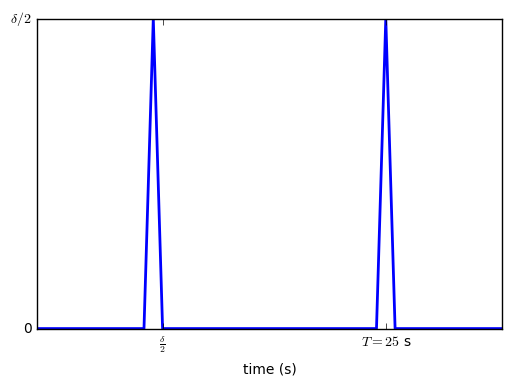

In [84]:
f = piecewise([[(-pulse_width/2,pulse_width/2),f1]]) # for FS series
fp = piecewise( # for plotting
    [
        [[-T/2,-pulse_width/2],0],
        [(-pulse_width/2,pulse_width/2),f1],
        [[pulse_width/2,T/2],0],
        [(T/2,T-pulse_width/2),0],
        [[T-pulse_width/2,T+pulse_width/2],f2],
        [(T+pulse_width/2,T+T/2),0],
        [[T+T/2,T+T/2],0]
    ]
)
N = 201 # number of points to plot
tpp = np.linspace(-T/2,3*T/2,N) # numeric array of time values
fpp = []
for i in range(0,N):
    fpp.append(fp(tpp[i])) # build array of function values
axes = plt.figure(1)
plt.plot(tpp,fpp,'b-',linewidth=2) # plot
plt.xlabel('time (s)')
plt.xlim([-T/2,3*T/2])
plt.xticks([pulse_width/2,T],['$\\frac{\delta}{2}$','$T='+str(T)+'$ s'])
plt.yticks([0,pulse_width/2],['0','$\delta/2$'])
if save_figures:
    tikz_save( # save for LaTeX's pgfplots
        'figures/fourier_series_to_transform_pulse'+
        str(T)+'.tex', 
        figureheight='.5\linewidth', 
        figurewidth='1\linewidth'
    )
plt.show() # display here

For $\delta = 2$ and $T \in [5,15,25]$, the left-hand column of \autoref{fig:fs_to_ft} shows two triangle pulses for each period $T$.

Consider the following argument.
Just as a Fourier series is a frequency domain representation of a periodic signal, a Fourier transform is a frequency domain representation of an *aperiodic* signal (we will rigorously define it in a moment).
The Fourier series components will have an analog, then, in the Fourier transform.
Recall that they can be computed by integrating over a period of the signal.
If we increase that period infinitely, the function is effectively aperiodic.
The result (within a scaling factor) will be the Fourier transform analog of the Fourier series components.

Let us approach this understanding by actually computing the Fourier series components for increasing period $T$.
*SageMath* has nice methods for its `piecewise` class,   `fourier_series_cosine_coefficient(n,T/2)` and  
`fourier_series_sine_coefficient(n,T/2)`, that can compute the Fourier series cosine and sine components $a_n$ and $b_n$ for component $n$ (`n`) and period $T$ (`T`).

In [85]:
f_cos = [];
f_sin = [];
f_harmonic_amplitude = [];
omega = [];
for i in range(0,n_max):
    f_cos.append(f.fourier_series_cosine_coefficient(i,T/2))
    f_sin.append(f.fourier_series_sine_coefficient(i,T/2))
    f_harmonic_amplitude.append(
        T/pulse_width*sqrt(f_cos[i]**2+f_sin[i]**2)
    )
    omega.append(2*pi*i/T)

Furthermore, we have computed the *harmonic amplitude*  
(`f_harmonic_amplitude`):
\begin{align}
    C_n = \sqrt{a_n^2 + b_n^2}
\end{align}
which we have also scaled by a factor $T/\delta$ in order to plot it with a convenient scale.

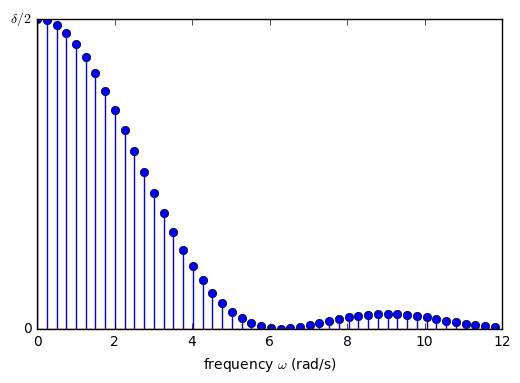

In [91]:
axes = plt.figure(2)
markerline, stemlines, baseline = plt.stem(
    omega, f_harmonic_amplitude, 
    linefmt='b-', markerfmt='bo', basefmt='r-'
)
plt.xlabel('frequency $\omega$ (rad/s)')
plt.xlim([0,omega_max])
plt.yticks([0,pulse_width/2],['0','$\delta/2$'])
if save_figures:
    tikz_save( # save for LaTeX
        'figures/fourier_series_to_transform_spectrum'+
        str(T)+'.tex', 
        figureheight='.5\linewidth', 
        figurewidth='1\linewidth'
    )
plt.show() # show here

The line spectra are shown in the right-hand column of \autoref{fig:fs_to_ft}.
Note that with our chosen scaling, as $T$ increases, the line spectra reveal a distinct waveform.

Let $F$ be the continuous function of angular frequency $\omega$
\begin{align}
F(\omega) = \frac{\delta}{2} \cdot \frac{\sin^2(\omega \delta/4)}{(\omega \delta/4)^2}.
\end{align}
First, we plot it.

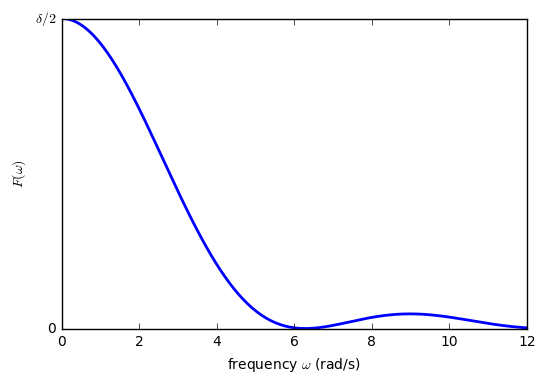

In [99]:
F(w) = pulse_width/2* \
    sin(w*pulse_width/(2*2))**2/ \
    (w*pulse_width/(2*2))**2
N = 201 # number of points to plot
wpp = np.linspace(0.0001,omega_max,N) # numeric array of time values
Fpp = []
for i in range(0,N):
    Fpp.append(F(wpp[i])) # build array of function values
axes = plt.figure(3)
plt.plot(wpp,Fpp,'b-',linewidth=2) # plot
plt.xlim([0,omega_max])
plt.yticks([0,pulse_width/2],['0','$\delta/2$'])
plt.xlabel('frequency $\omega$ (rad/s)')
plt.ylabel('$F(\omega)$')
if save_figures:
    tikz_save( # save for LaTeX
        'figures/fourier_series_to_transform_transform.tex', 
        figureheight='.5\linewidth', 
        figurewidth='1\linewidth'
    )
plt.show()

Let's consider the plot in \autoref{fig:fs_to_ft_ft} of $F$.
It's obviously the function emerging in \autoref{fig:fs_to_ft} from increasing the period of our pulse train.

Now we are ready to define the Fourier transform and its inverse.

So now we have defined the Fourier transform.
There are many applications, including solving differential equations and *frequency domain*  
representations&mdash;called *spectra*&mdash;of *time domain* functions.

There is a striking similarity between the Fourier transform and the Laplace transform, with which you are already acquainted.
In fact, the Fourier transform is a special case of a Laplace transform with Laplace transform variable $s = j\omega$ instead of having some real component.
Both transforms convert differential equations to algebraic equations, which can be solved and inversely transformed to find time-domain solutions.
The Laplace transform is especially important to use when an input function to a differential equation is not absolutely integrable and the Fourier transform is undefined (for example a step or ramp function).
However, the Laplace transform is also preferred for *initial value problems* due to its convenient way of handling them.
The two transforms are equally useful for solving steady state problems.
Although the Laplace transform has many advantages, for spectral considerations, the Fourier transform is the only game in town.

A table of Fourier transforms and their properties can be found on the course website in the "Resources" section.